***

<center><u><H1>Reti neural in Python: fondamenti</H1></u></center>

***

In Python, ci sono due package principali per sviluppare reti neurali in Python ed entrambi danno la possibilità di sfruttare l'accelerazione tramite GPU:
- [PyTorch](https://pytorch.org) (sviluppato da Facebook);
- [Tensorflow](https://www.tensorflow.org) (sviluppato da Google).

Per quanto riguarda l'ottimizzazione degli iper-parametri, occorre installare [SciKeras](https://adriangb.com/scikeras/stable/): come vedremo, occorre per poter gestire la ricerca attraverso un modello NN compilato.

Keras fornisce dei tool di alto livello e più user-friendly rispetto ad una pura programmazione con PyTorch o Tensorflow: è l'approccio che useremo nel corso.

# 1 La classe Sequential

Un primo modo per sviluppare una NN con Python è creare un oggetto della classe [Sequential](https://keras.io/api/models/sequential/) di Keras. Questo oggetto ci permette di creare un modello di NN come **sequenza di layer**, ognuno con **un tensore in ingresso** e **un tensore in uscita**:
- **attributi**
    - layers: se già generati, si possono inserire nel costruttore;
    - trainable: indica se i pesi della rete sono modificabili o "congelati" (fondamentalmente, se la rete è allenabile);
    - name: nome della rete (per la visualizzazione della rete, principalmente);
- **metodi**
    - add(): permette di aggiungere una istanza della classe layer;
    - pop(): permette di rimuovere una istanza della classe layer.

La classe [Layer](https://keras.io/api/layers/base_layer/) permette di creare un layer della rete neurale. Si possono creare facilmente delle nuove classi che ereditano da Layer e si può anche sfruttare la [API](https://keras.io/api/layers/) messa a disposizione da Keras che fornisce numerosissime funzionalità pronte all'uso.

## 1.1 Perceptron

Come primo esempio, creiamo un semplice perceptron: contiene solamente input e output layer. Facciamo alcune ipotesi:
- per adesso non occorre un dataset, quindi immaginiamo di avere $M=4$ feature in ingresso;
- immaginiamo di avere un problema di classificazione binaria tra le mani, quindi l'output layer avrà una sigmoide come activation function.

Per implementarlo, creaimo una istanza di Sequential non indicando alcun layer (li possiamo inserire dopo) e specificando il nome della nostra rete:

In [1]:
from keras import Sequential
perceptron_model = Sequential(layers = None, name = 'perceptron')

Aggiungiamo solamente un input layer come un oggetto [InputLayer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer): permette di definire l'ingresso alla rete neurale. Per l'output layer, creiamo un oggetto dense layer tramite la classe [layers.Input](https://keras.io/api/layers/core_layers/dense/): si tratta del layer di base fornito dalla API di Keras che permette di creare un layer fully connected. Per inserirli nella nostra rete, utilizziamo il metodo **add()** dell'oggetto Sequential:

In [2]:
from keras import layers
n_features = 4
perceptron_model.add(layers.InputLayer(name = 'input_layer', shape=(n_features,)))
perceptron_model.add(layers.Dense(name = 'output_layer', units = 1, activation = 'sigmoid'))

Possiamo stampare un riassunto della nostra rete tramite il metodo **summary()** dell'oggetto Sequential:

In [3]:
perceptron_model.summary()

Model: "perceptron"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

Possiamo osservare che:
- l'output layer ha una forma (None, 1): è un tensore colonna con un singolo elemento (il nodo di uscita appunto);
- i parametri da ottimizzare tra questo layer e il precedente (che è l'input nel perceptron) è 5: 4 feature in ingresso e 1 valore di bias;
- ogni parametro impiega 4 Byte di memoria, ovvero 32 bit: i tensori in TensorFlow sono rappresentati con valori float a 32 bit. 

Il bias è un parametro molto importante nelle reti neurali in quanto permette di modificare con un valore costante la funzione di attivazione. Il risultato è uno shift a destra (bias positivo) o a sinistra (shift negativo) per adattarsi meglio alle necessità. Infatti, il solo peso permette di modificare la forma della funzione di attivazione, non di traslarla! Un tutorial interessante sull'importanza dei bias è disponibile a [questo link](https://www.turing.com/kb/necessity-of-bias-in-neural-networks#).

## 1.2 Deep NN

Per passare ad una Deep NN, seguiamo lo stesso approccio del perceptron, aggiungendo diversi hidden layer. Solitamente, un buon inizio è sempre quello di ricorrere ad una ReLu come activation function. Per questo esempio, anche per giustificare la necessità di una Deep NN, immaginiamo di avere un dataset con $M=15$ feature.

Per quanto riguarda il numero di hidden layer o di nodi per layer, non c'è una regola fissa nelle reti neurali. Diversi approcci sono stati proposti nel corso degli anni, ma nessuno abbastanza generale per coprire tutti i casi. Si deve, quindi, fare alcuni tentativi per capire in che direzione andare con il design. In ogni caso, dovendo pur partire da qualche parte, si può tenere conto di quanto segue:
- **il numero di layer è legato alla complessità** del problema: più difficile il task, più layer occorrono. Ad esempio, con un perceptron (0 hidden layer) si può rappresentare una qualsiasi funzione linearmente separabile;
- **il numero di nodi è più delicato** e diversi approcci sono stati proposti. Spessp, negli hidden layer si inserisce un numero di nodi compreso tra la dimensione dell'input layer e quella dell'output layer. Per il primo hidden layer, alcune possibilità sono le seguenti:
    - 2/3 dell'input layer + output layer
    - media di input layer + output layer
    - radice quadrata di input layer * output layer

Va sempre tenuto a mente che troppi nodi portano ad overfitting, mentre un numero troppo limitato di nodi può portare ad underfitting.

Nel nostro caso, potremmo ad esempio inserire due hidden layer con numero di nodi pari a $\sqrt{15+1}=4$ e $2$, prima dell'output layer:


In [4]:
from keras import Sequential, layers
dnn_model = Sequential(layers = None, name = 'deep_NN')
n_features = 15
dnn_model.add(layers.InputLayer(name = 'input_layer', shape=(n_features,)))

In [5]:
dnn_model.add(
    layers.Dense(
        name = 'hidden_1',
        units = 4,
        activation = 'relu',
    )
)

dnn_model.add(
    layers.Dense(
        name = 'hidden_2',
        units = 2,
        activation = 'relu',
    )
)

dnn_model.add(
    layers.Dense(
        name = 'output_layer',
        units = 1,
        activation = 'sigmoid',
    )
)

In [6]:
dnn_model.summary()

Model: "deep_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 4)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77 (308.00 B)

 Trainable params: 77 (308.00 B)

 Non-trainable params: 0 (0.00 B)

# 2 La classe Models

Un secondo approccio è possibile tramite la classe [Model](https://keras.io/api/models/model/) del modulo [keras.models](https://keras.io/api/models/) che, rispetto a Sequential, permette:
- la creazione di reti multi-input e/o multi-output
- la creazione di reti modulari (non solo lineari)

Questa flessibilità è ottenuta indicando direttamente la relazione tra layer quando sono aggiunti e dovendo compilare esplicitamente il modello prima del suo utilizzo.

## 2.1 Perceptron

Vediamo come ottenere il perceptron con un oggetto Model:

In [7]:
from keras import layers, models
n_features = 4

inputs = layers.Input(name = 'input_layer', shape = (n_features,))
outputs = layers.Dense(name = 'output_layer', units = 1, activation = 'sigmoid')(inputs)

model = models.Model(inputs = inputs, outputs = outputs, name = 'perceptron')

In [8]:
model.summary()

Model: "perceptron"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

Possiamo notare come:
- per il generico layer, tranne l'input, va indicato il layer che fornisce l'input;
- il modello va costruito passando input e output: i legami indicati tra i layer permettono poi la riconstruzione del modello complessivo;
- nel riassunto compare esplicitamente l'input layer, che non ha parametri da ottimizzare (i pesi e il bias sono sempre legati al layer in cui vengono utilizzati).

## 2.2 Deep NN

Nel caso di una deep NN, procediamo in modo simile:

In [9]:
from keras import layers, models
n_features = 15

inputs = layers.Input(name = 'input_layer', shape = (n_features,))
h1 = layers.Dense(name = 'hidden_1', units = 4, activation = 'relu')(inputs)
h2 = layers.Dense(name = 'hidden_2', units = 2, activation = 'relu')(h1)
outputs = layers.Dense(name = 'output_layer', units = 1, activation = 'sigmoid')(h2)

model = models.Model(inputs = inputs, outputs = outputs, name = 'deep_NN')

In [10]:
model.summary()

Model: "deep_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 4)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77 (308.00 B)

 Trainable params: 77 (308.00 B)

 Non-trainable params: 0 (0.00 B)

Possiamo visualizzare il modello tramite la funzione [tf.keras.utils.plot_model](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model), che richiede l'installazione esplicita (da terminale, non da PyCharm) di graphviz.


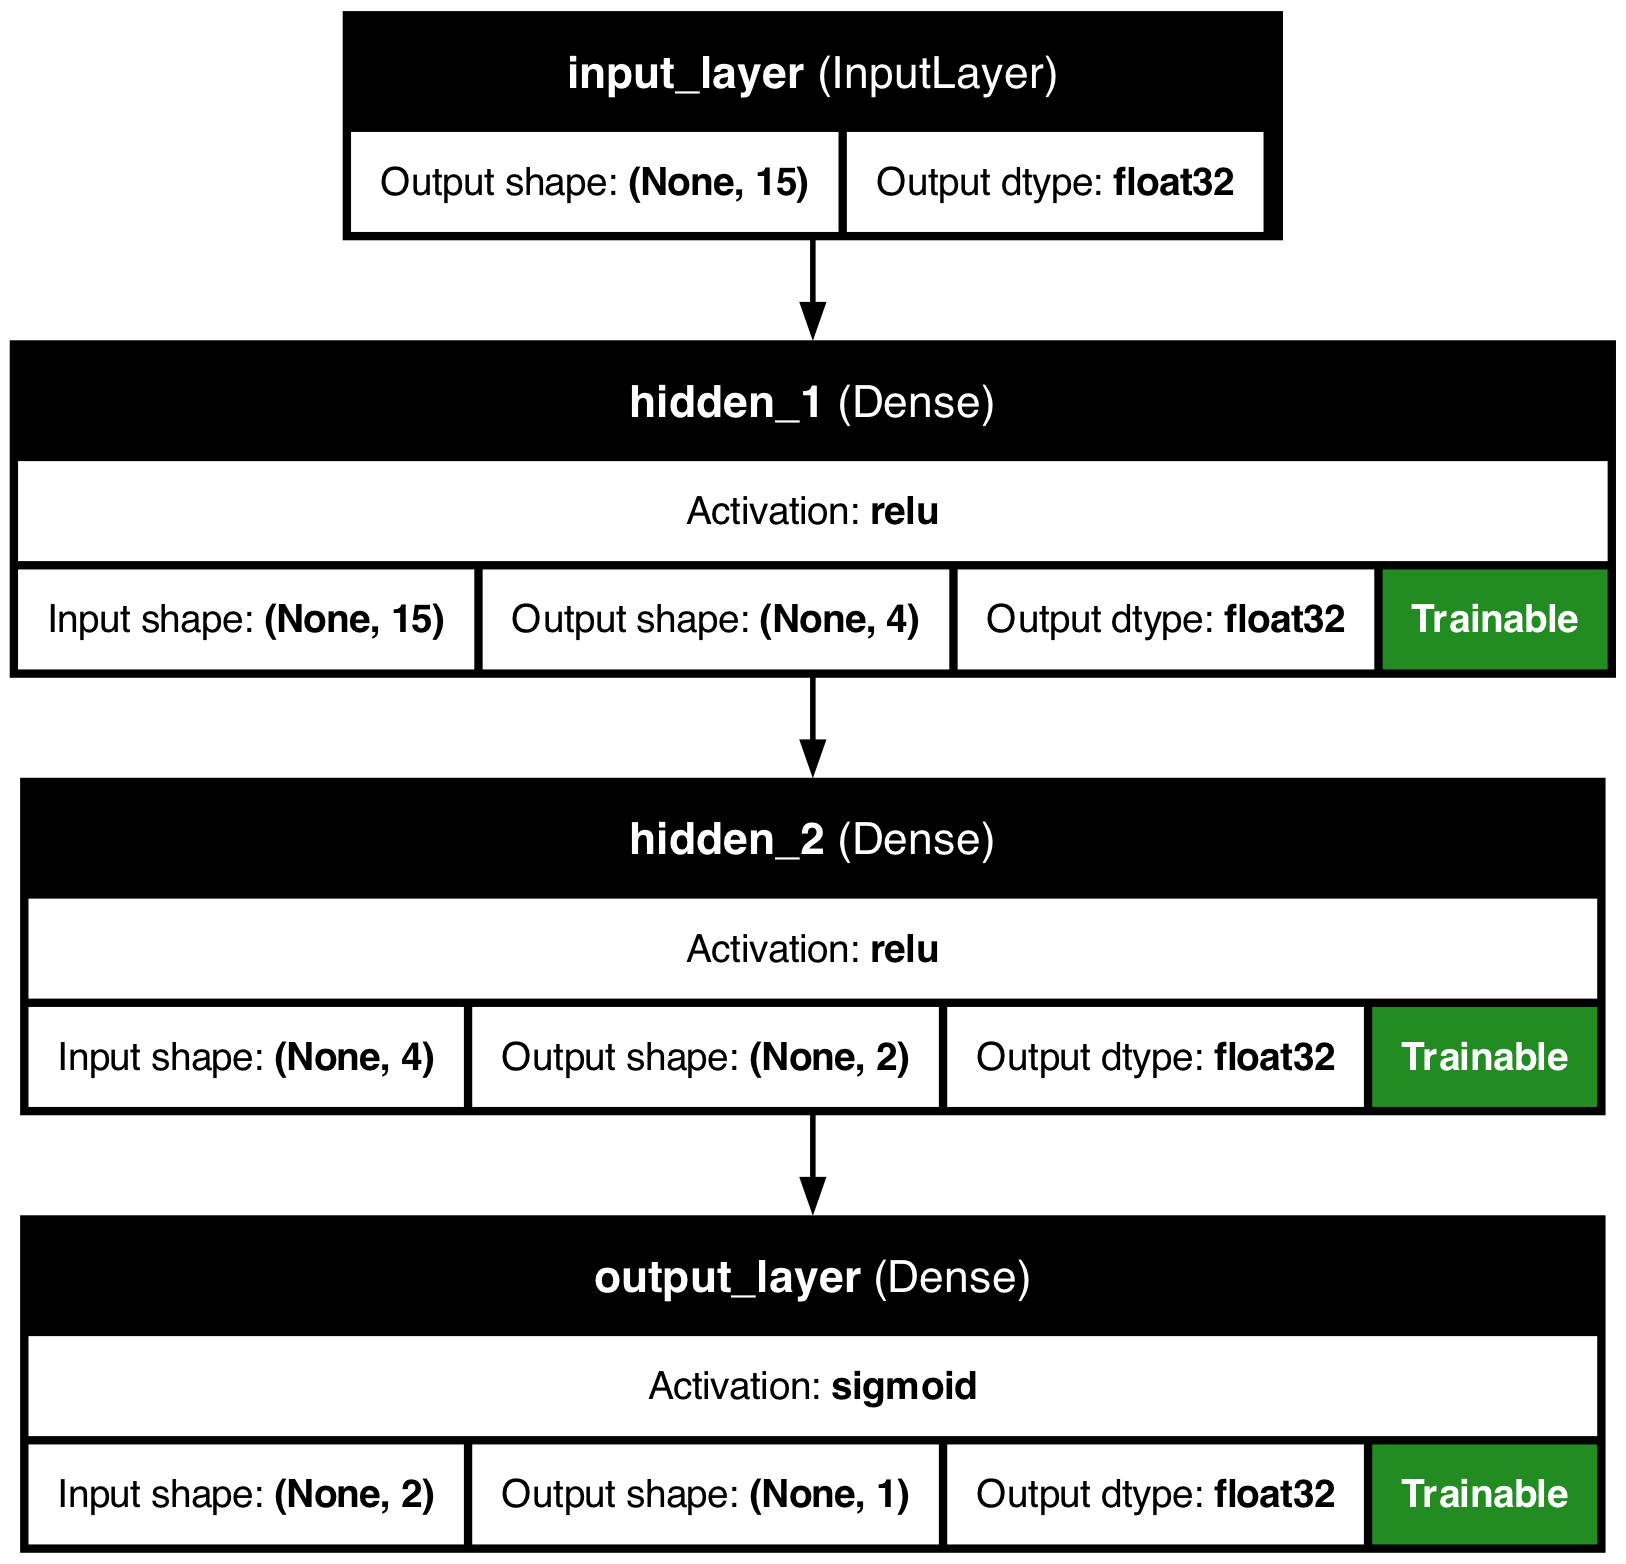

In [16]:
import tensorflow as tf

tf.keras.utils.plot_model(
    model,
    rankdir='TB',
    show_shapes=True,
    show_layer_names=True,
    show_dtype=True,
    show_layer_activations=True,
    show_trainable=True
)

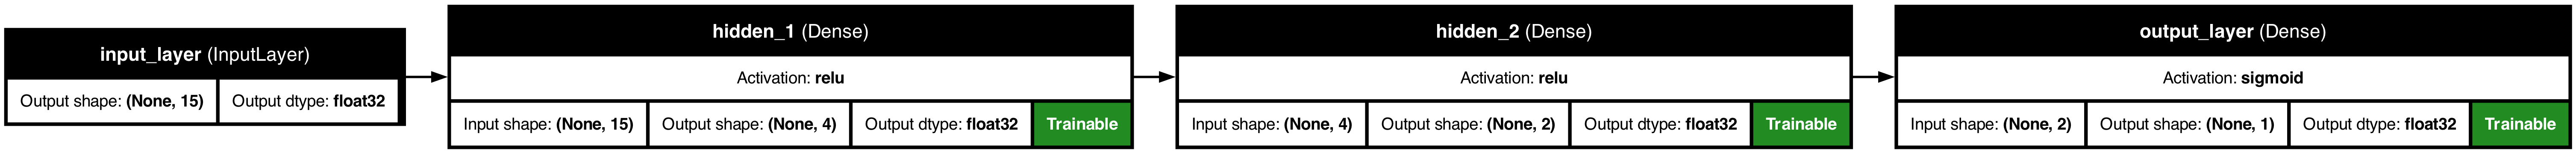

In [17]:
tf.keras.utils.plot_model(
    model,
    rankdir='LR',
    show_shapes=True,
    show_layer_names=True,
    show_dtype=True,
    show_layer_activations=True,
    show_trainable=True
)

# 3 Addestramento e prestazioni

Per quanto riguarda il pre-processing, anche con le reti neurali è necessario implementare il feature scaling con due accorgimenti rispetto a Machine Learning: è necessario implementarlo anche con la regressione e va implementato anche sulle dummy feature ottenute con il data encoding! A valle di questo, il dataset va diviso in training e test set.

Per quanto riguarda il modello da addestrare, questo va anche compilato prima di poter procedere.

Vedremo questi concetti all'opera nei prossimi notebook. 